## DLL

## Домашняя работа 1  |  Персептрон

## Иванов Денис

In [22]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader

from google.colab import drive 

In [23]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
PATH  = '/content/drive/My Drive/DLL/'

1.   Реализовать обучение линейной регрессии для задачи boston house prices (https://www.kaggle.com/vikrishnan/boston-house-prices) с использованием torch’а

In [25]:
df = pd.read_csv(PATH+'housing.csv', header=None, delimiter=r"\s+")
print(df.head())

        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


In [26]:
features_data = df[df.columns[:-1]]

# Нормализация X
features_data = features_data.apply(lambda x: (x - x.mean()) / x.std()) 

In [27]:
features = features_data.to_numpy()
labels = df[df.columns[-1]].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [28]:
X_train = torch.tensor(X_train, dtype=torch.float)
X_test  = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test  = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)

print(X_train.shape, Y_train.shape, X_train.type(), Y_train.type())

torch.Size([404, 13]) torch.Size([404, 1]) torch.FloatTensor torch.FloatTensor


shaffle - false

In [29]:
model      = torch.nn.Sequential(torch.nn.Linear(13, 1))

torch.nn.init.normal_(model[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(model[0].bias, val=0)

datasets   = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=25, shuffle=False)
loss       = torch.nn.MSELoss()
optimizer  = torch.optim.SGD(model.parameters(), lr=0.005)

In [30]:
# Обучение
num_epochs = 17
for epoch in range(1, num_epochs + 1):
    for x, y in train_iter:
        output = model(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch #', epoch, 'loss = ', l.item())

epoch # 1 loss =  453.84637451171875
epoch # 2 loss =  305.9334411621094
epoch # 3 loss =  216.44424438476562
epoch # 4 loss =  156.87657165527344
epoch # 5 loss =  115.84310150146484
epoch # 6 loss =  87.13327026367188
epoch # 7 loss =  66.86174011230469
epoch # 8 loss =  52.44938659667969
epoch # 9 loss =  42.137107849121094
epoch # 10 loss =  34.70861053466797
epoch # 11 loss =  29.316774368286133
epoch # 12 loss =  25.36882972717285
epoch # 13 loss =  22.448713302612305
epoch # 14 loss =  20.26336669921875
epoch # 15 loss =  18.60589599609375
epoch # 16 loss =  17.32981300354004
epoch # 17 loss =  16.33102035522461


In [31]:
loss(model(X_test), Y_test).item()

27.58080291748047

In [32]:
model[0].weight, model[0].bias

(Parameter containing:
 tensor([[-0.5530,  1.1708, -0.2637,  0.9477, -0.7979,  3.7356, -0.3595, -2.0585,
           0.3740, -0.6030, -1.7492,  0.6615, -2.9374]], requires_grad=True),
 Parameter containing:
 tensor([21.3390], requires_grad=True))

shuffle - true

In [33]:
model_shuff      = torch.nn.Sequential(torch.nn.Linear(13, 1))

torch.nn.init.normal_(model_shuff[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(model_shuff[0].bias, val=0)

datasets   = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=25, shuffle=True)
loss       = torch.nn.MSELoss()
optimizer  = torch.optim.SGD(model_shuff.parameters(), lr=0.02)

In [34]:
# Обучение
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    for x, y in train_iter:
        output = model_shuff(x)
        l = loss(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print('epoch #', epoch, 'loss = ', l.item())

epoch # 10 loss =  5.965022087097168
epoch # 20 loss =  7.293479919433594
epoch # 30 loss =  16.871173858642578
epoch # 40 loss =  109.49775695800781
epoch # 50 loss =  3.425614833831787
epoch # 60 loss =  12.973479270935059
epoch # 70 loss =  13.088701248168945
epoch # 80 loss =  9.239013671875
epoch # 90 loss =  47.209049224853516
epoch # 100 loss =  10.703770637512207


In [35]:
loss(model_shuff(X_test), Y_test).item()

23.270339965820312

In [36]:
model_shuff[0].weight, model_shuff[0].bias

(Parameter containing:
 tensor([[-0.8894,  1.2769,  0.2122,  0.7815, -1.9610,  2.8155, -0.2345, -3.2558,
           2.3972, -2.2946, -2.1414,  0.9104, -3.6077]], requires_grad=True),
 Parameter containing:
 tensor([22.5218], requires_grad=True))

2.   Реализоыать наивный баесовский классификатор для MNIST (взяв всего 2 цифры “1” и “2”) 

In [37]:
import torchvision

In [38]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [39]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

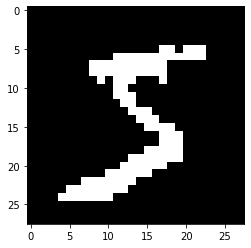

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [41]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: <function transform at 0x7f64c61115f0>

In [44]:
n_class1, n_class2  = torch.tensor(0), torch.tensor(0)

classes_stat        = torch.zeros((2,2,784))#.to(dev) 
total_stat          = torch.zeros((2,784))#.to(dev) 

In [45]:
for i in range(len(mnist_train)):
    class_id = mnist_train[i][1]
    if class_id == 1 or class_id == 2:
        n_class1 += 1 if class_id == 1 else 0
        n_class2 += 1 if class_id == 2 else 0
    
        mnist_train_item = mnist_train[i][0].numpy().astype(int)
        
        for p in range(784):
            v = mnist_train_item[p]
            classes_stat[class_id - 1][v][p] += 1
            total_stat[v][p] += 1

print(n_class1, n_class2)

tensor(6742) tensor(5958)


In [46]:
p_1 = n_class1 / float(n_class1 + n_class2)
p_2 = 1. - p_1

classes_stat[0] /= float(n_class1)
classes_stat[1] /= float(n_class2)

total_stat /= float(n_class1 + n_class2)

In [47]:
from sklearn.metrics import classification_report

In [48]:
forecast = []
labels =   []

for i in range(len(mnist_test)):
    class_id = mnist_test[i][1]
    if class_id == 1 or class_id == 2:
        labels.append(class_id)
        class_fcst, p1 = 1, 1.
        mnist_test_item = mnist_test[i][0].numpy().astype(int)
        for p in range(784):
            v = mnist_test_item[p]
            p1 *= classes_stat[0][v][p] / total_stat[v][p] 

            if p1 * p_1 > 0.5:
                class_fcst = 1
            else:
                class_fcst = 2
        forecast.append(class_fcst)   

print(classification_report(forecast, labels))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96      1055
           2       1.00      0.92      0.96      1112

    accuracy                           0.96      2167
   macro avg       0.96      0.96      0.96      2167
weighted avg       0.96      0.96      0.96      2167



2.1.   Сравнить наивный баесовский классификатор для MNIST  с sclearn’овским

In [49]:
train = np.loadtxt(PATH + 'mnist/train.csv', delimiter=',', skiprows=1)
test  = np.loadtxt(PATH + 'mnist/test.csv' , delimiter=',', skiprows=1)

In [50]:
train_label = train[:, 0]
train_img   = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img    = np.resize(test, (test.shape[0], 28, 28))

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(np.resize(train_img, (train.shape[0], 28*28)), 
                                                      train_label, 
                                                      test_size=0.20, 
                                                      random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier


clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = GradientBoostingClassifier(n_estimators =50, learning_rate=0.1, 
                                  random_state=1)

In [55]:
eclf2 = VotingClassifier(estimators=[
         ('rf', clf2), 
         ('gnb', clf3),
         ('xgb', clf4)], 
         voting='hard')

eclf2.fit(X_train,  y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
from sklearn.model_selection import cross_val_score

for clf, label in zip([ clf2, clf3, clf4, eclf2], 
                      ['Random Forest', 'GaussianNB',
                       'XG boost', 'Ensemble']):
     scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), 
                                                 scores.std(), label))

Accuracy: 0.96 (+/- 0.00) [Random Forest]
Accuracy: 0.57 (+/- 0.01) [GaussianNB]
Accuracy: 0.92 (+/- 0.00) [XG boost]
